# Exercise: 4-level system in contact with a heat bath

Consider a quantum mechanical system of one single particle in a 4 level system with a Hamiltonian given by:

$$ H = \begin{bmatrix} E_1 & V & 0 & 0 \\ V & E_2 & V & 0 \\ 0 & V & E_3 & V \\ 0 & 0 & V & E_4 \end{bmatrix} \tag{Equation 1.}$$

where $E_i$ represents the energy levels and $V$ is the non-zero hopping element between adjacent levels. The system is in contact with a heat bath at temperature $T$.



## Task 1: Calculating eigenvalues, eigenvectors and partition function.

</br>
The first task is to implement two functions as follows:


1. Implement a function to calculate the eigenvalues and eigenvectors of a Hamiltonian matrix.
    
    - This function must take the Hamiltonian as input, diagonalize it, and return the eigenvalues and the eigenvectors as output.
    - **Hint**: np.linalg.eigh

</br>

2. Implement a function to calculate the partition function $Z$ according to Equation 2 .

    - This function must take the Hamiltonian and temperature as inputs, and return the partition function.
    - The function will call the previous function to obtain the eigenvalues of the Hamiltonian and use these to calculate the trace.
    

$$ Z = \Tr\left(\exp\left(-\frac{H}{k_B T}\right)\right) \tag{Equation 2.} $$

### Note: As you move through the exercise, make use of the functions you already implemented. Example: make use of the diagonalize_hamiltonian function when implementing the partition_function function!




In [156]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
import scipy

In [157]:
# Boltzmann constant in eV/K (you can adjust this if your eigenvalues are in a different unit)
k_B = 8.617333262145e-5

In [158]:
def diagonalize(hamiltonian):
    eigenvalues, eigenvectors = np.linalg.eig(hamiltonian)
    return eigenvalues, eigenvectors

In [159]:
def partition(hamiltonian, t):
    Z = np.trace(np.exp(- hamiltonian / (k_B * t)))
    return Z

## Task 2: Density matrix and thermodynamic quantities.


</br>
The second task is to implement three functions as follows:



1. Implement a function to calculate the density matrix for the system, according to Equation 3, where $E_i$ are the eigenvalues and $\left| \psi_i \right\rangle$ the eigenvectors.

    
    - This function must take the Hamiltonian and temperature as inputs, and return the density matrix.
    - This function will call the two functions implemented in Task 1 to calculate the eigenvalues, eigenvectors and partition function.
    - Do **not** use any python library to exponentiate the Hamiltonian.

$$ \rho = \frac{1}{Z} e^{-\frac{H}{k_B T}} = \frac{1}{Z} \sum_{i} e^{-\frac{E_i}{k_B T}} \left| \psi_i \right\rangle \left\langle \psi_i \right| \tag{Equation 3.}$$


2. Implement a function to calculate the energy for the system, according to Equation 4.

    - This function must take the Hamiltonian as an input, and output the energy.

$$ E = \Tr(H \cdot \rho)  \tag{Equation 4.}$$


3. Implement a function to calculate the entropy for the system, according to Equation 5.

    
    - This function must take the Hamiltonian as an input, and output the entropy.
    - **Hint:** scipy.linalg.logm


$$ S = -k_B  \Tr(\rho \ln(\rho))  \tag{Equation 5.}$$





4. Implement a function to calculate the specific heat for the system, according to Equation 6.
    - This function must take the Hamiltonian and temperature as inputs, and return the specific heat.
    - **Hint:** scipy.linalg.expm

$$ C_v = \frac{1}{{k_B T^2}} \text{Tr}\left(H^2 \cdot \exp\left(-\frac{H}{{k_B T}}\right)\right)\tag{Equation 6.}$$



In [160]:
def density_matrix(hamiltonian, t):
    sum_ = 0
    for idx, num in enumerate(hamiltonian[0]):
        sum_ += np.exp(-diagonalize(hamiltonian)[0][idx] / (k_B * t)) * np.atleast_2d(diagonalize(hamiltonian)[1][:, idx]).T * np.atleast_2d(diagonalize(hamiltonian)[1][:, idx])
    return 1 / partition(hamiltonian, t) * sum_

In [161]:
def calculate_energy(hamiltonian, t):
    energy = np.trace(hamiltonian * density_matrix(hamiltonian, t))
    return energy

In [162]:
def calculate_entropy(hamiltonian, t):
    entropy = - k_B * np.trace(density_matrix(hamiltonian, t) * scipy.linalg.logm(density_matrix(hamiltonian, t)))
    return entropy

In [163]:
def heat(hamiltonian, t):
    specific_heat = 1 / (k_B * t ** 2) * np.trace(scipy.linalg.expm(hamiltonian) * scipy.linalg.logm(-hamiltonian / (k_B * t)))
    return specific_heat

## Task 3: Plotting


</br>
The third task is to generate two plots as follows:



1. Plot the specific heat $C_v$ as a function of temperature (for $0K \lt T \lt 40000K$) for the following hamiltonian:

$$ H = \begin{bmatrix} 1 & 0.1 & 0 & 0 \\ 0.1 & 1.1 & 0.1 & 0 \\ 0 & 0.1 & 1.15 & 0.1 \\ 0 & 0 & 0.1 & 1.16 \end{bmatrix} $$


2. Plot the eigenvalues of the density matrix $\rho$ as a function of temperature (for $0K \lt T \lt 10000K$) for the same hamiltonian.





In [164]:
E1 = 1
E2 = 1.1
E3 = 1.15
E4 = 1.16
V = 0.1
hamiltonian = np.array([[E1, V, 0, 0],
                        [V, E2, V, 0],
                        [0, V, E3, V],
                        [0, 0, V, E4]])

t = np.arange(3e3, 4e4, 1e3)

Text(0.5, 0, 'Temperature in K')

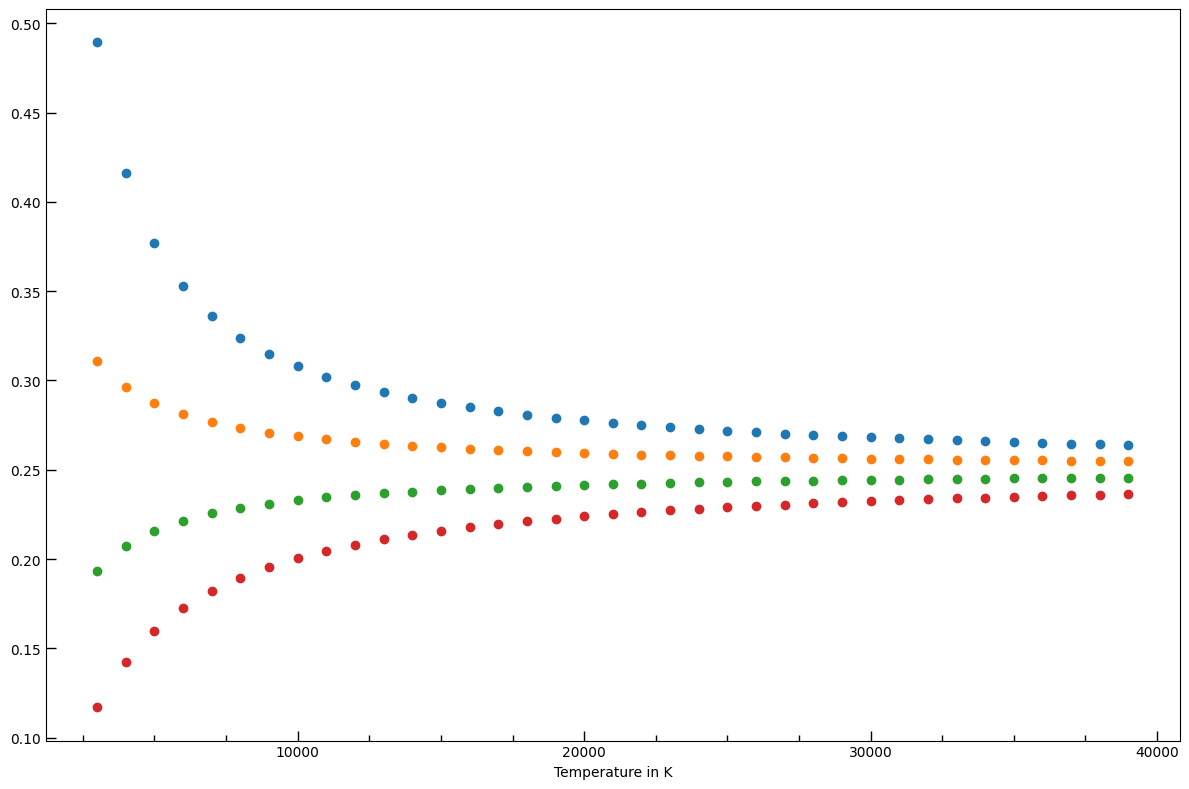

In [165]:
fig, ax = plt.subplots(tight_layout=True, figsize=(12, 8))
y = ([], [], [], [])
for n in t: 
    for idx, num in enumerate(hamiltonian[0]):
        y[idx].append(np.linalg.eig(density_matrix(hamiltonian, n))[0][idx])
        
ax.scatter(t, y[0])
ax.scatter(t, y[1])
ax.scatter(t, y[2])
ax.scatter(t, y[3])

ax.xaxis.set_major_locator(MultipleLocator(1e4))
ax.xaxis.set_minor_locator(MultipleLocator(2.5e3))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.tick_params(direction='in', which='both', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.set_xlabel("Temperature in K")

# Grading block for Tasks 1 and 2: Use the following cells to test your code


In [166]:
# For the following Hamiltonian:
E1=1e-1
E2=1.1e-1
E3=1.15e-1
E4=1.16e-1
V=0.01
T=300
hamiltonian_example = np.array([[E1, V, 0, 0],
                                [V, E2, V, 0],
                                [0, V, E3, V],
                                [0, 0, V, E4]], dtype=float)

In [167]:
eigen_values, eigen_vectors = diagonalize(hamiltonian_example)
Z = partition(hamiltonian_example, T)
rho = density_matrix(hamiltonian_example, T)
E = calculate_energy(hamiltonian_example, T)
S = calculate_entropy(hamiltonian_example, T)
C_v = heat(hamiltonian_example, T)


print(f"Eigenvalues: {eigen_values}")
print(f"Eigenvectors: \n {eigen_vectors}")
print(f"Density matrix: \n {rho}")
print(f"Energy: {E}")
print(f"Entropy: {S}")
print(f"Specific heat: {C_v}")

Eigenvalues: [0.09206543 0.10377018 0.11610464 0.12905975]
Eigenvectors: 
 [[ 0.73725659  0.5208189  -0.40182112  0.15407851]
 [-0.58498112  0.19635809 -0.64711827  0.4477483 ]
 [ 0.31188167 -0.64314646  0.006779    0.69931859]
 [-0.13030596  0.52588382  0.6478671   0.53547622]]
Density matrix: 
 [[ 0.38435975 -0.12094934  0.02037175 -0.00240333]
 [-0.12094934  0.28378216 -0.09279504  0.01652643]
 [ 0.02037175 -0.09279504  0.23353932 -0.08047586]
 [-0.00240333  0.01652643 -0.08047586  0.2089653 ]]
Energy: 0.1207490095108675
Entropy: 0.0001300526007393749
Specific heat: (0.8309719691012506+1.8093256514947915j)


# You should obtain the following values:

In [168]:
'''
Eigenvalues: [0.09206543 0.10377018 0.11610464 0.12905975]
Eigenvectors: 
 [[ 0.73725659  0.5208189  -0.40182112  0.15407851]
 [-0.58498112  0.19635809 -0.64711827  0.4477483 ]
 [ 0.31188167 -0.64314646  0.006779    0.69931859]
 [-0.13030596  0.52588382  0.6478671   0.53547622]]
Density matrix: 
 [[ 0.34606847 -0.10889994  0.01834224 -0.0021639 ]
 [-0.10889994  0.25551078 -0.08355047  0.01488001]
 [ 0.01834224 -0.08355047  0.21027331 -0.07245857]
 [-0.0021639   0.01488001 -0.07245857  0.18814744]]
Energy: 0.10342138697804787
Entropy: 0.00010847893113505411
Specific heat: 9.018269718333504e-05
'''

'\nEigenvalues: [0.09206543 0.10377018 0.11610464 0.12905975]\nEigenvectors: \n [[ 0.73725659  0.5208189  -0.40182112  0.15407851]\n [-0.58498112  0.19635809 -0.64711827  0.4477483 ]\n [ 0.31188167 -0.64314646  0.006779    0.69931859]\n [-0.13030596  0.52588382  0.6478671   0.53547622]]\nDensity matrix: \n [[ 0.34606847 -0.10889994  0.01834224 -0.0021639 ]\n [-0.10889994  0.25551078 -0.08355047  0.01488001]\n [ 0.01834224 -0.08355047  0.21027331 -0.07245857]\n [-0.0021639   0.01488001 -0.07245857  0.18814744]]\nEnergy: 0.10342138697804787\nEntropy: 0.00010847893113505411\nSpecific heat: 9.018269718333504e-05\n'